# Improving MCMC Efficiency: QR vs. Basic Parameterizations in Bayesian Linear Regression

## 1. Import Libraries

In [1]:
import os
import sys

# Add the library directory to the path so Python can find the modules
current_notebook_dir = os.getcwd()
library_dir = os.path.join(current_notebook_dir, "..", "library", "python")
sys.path.append(library_dir)

# Import the needed functions
from generate_data import generate_linear_regression_data
from run_models import run_stan_model_cmdstanpy
from plot import plot_stan_data, plot_trace_plots


s:\Learning\stan-models\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Generate and Plot Data

In [2]:
N_data = 200
K_features = 5

print(f"--- Generating data for N={N_data}, K={K_features} ---")
stan_data = generate_linear_regression_data(N=N_data, K=K_features, sigma_true=1.5, intercept_true=10.0)

--- Generating data for N=200, K=5 ---
--- True Parameters for Data Generation ---
True Intercept (alpha): 10.00
True Coefficients (beta): [-2.71  2.49  0.71 -3.77 -1.45]
True Error Std Dev (sigma): 1.50
----------------------------------------



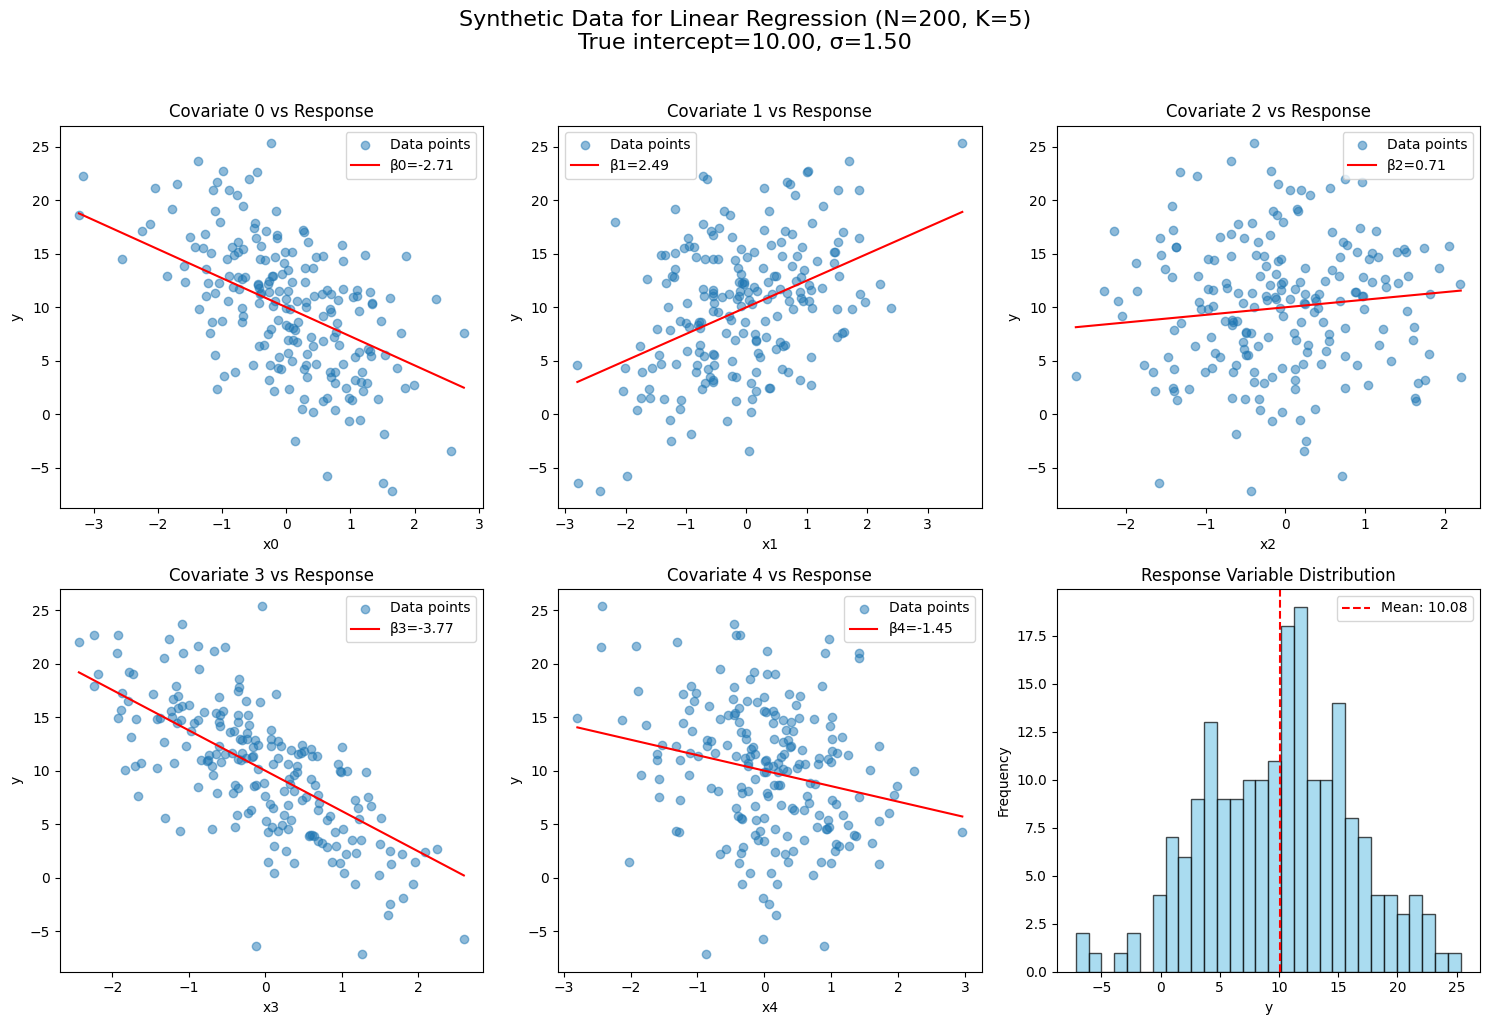

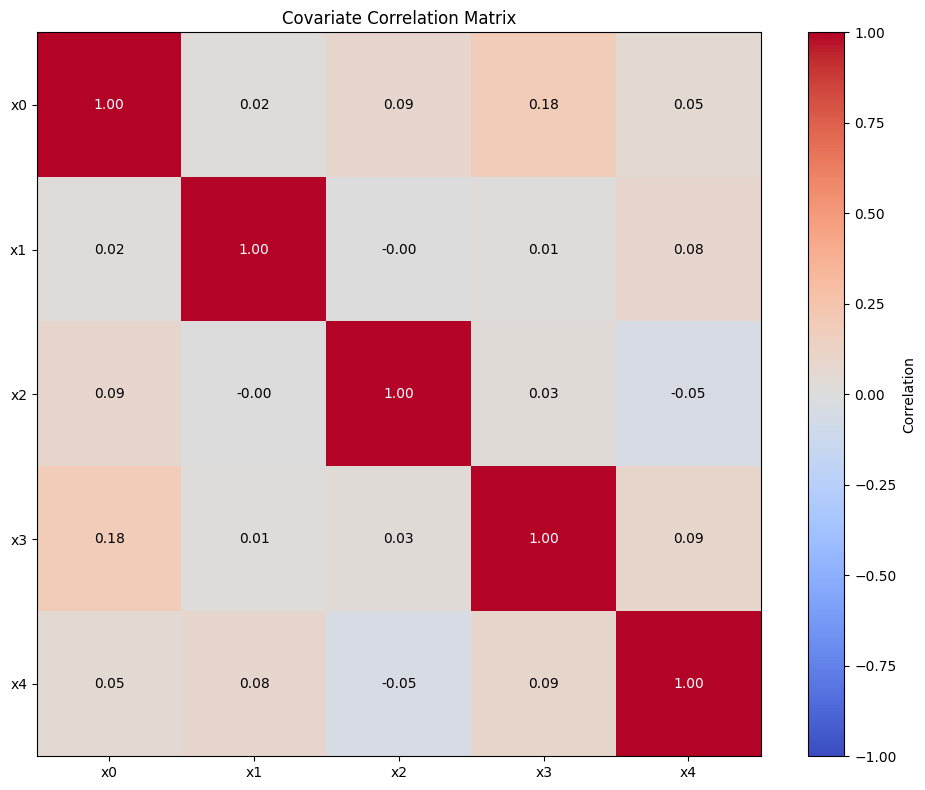

In [3]:
plot_stan_data(stan_data)

## 3. Models

### 3.1 Basic

The model that we'll fit is:

\begin{align*}
y_{i} &\sim \textrm{Normal}(\mu_{i}, \sigma^{2}) ~~~ \textrm{for}~ i=1, ..., N, \\
\mu_{i} &= \alpha + \boldsymbol{x}_{i}^{\top} \boldsymbol{\beta}, \\
\alpha &\sim \textrm{Normal}(0, 10^{2}), \\
\boldsymbol{\beta} &\sim \textrm{Normal}(\boldsymbol{0}, 2.5^{2}\boldsymbol{I}), \\
\sigma &\sim \textrm{Cauchy}(0, 5),
\end{align*}

where 

* $y_{i}$ is the response of the $i$ th observation.
* $\boldsymbol{x}_{i}$ is the vector of covariate values for the $i$ th observation.
* $\alpha$ is the intercept term.
* $\boldsymbol{\beta}$ is the vector of effects for the fixed covariates.

### 3.2 QR Decomposition

## 4. Results

In [4]:
base_path = os.path.join(current_notebook_dir, "..", "library", "stan")

models_to_run = [
    {"name": "Gaussian Linear Regression (Basic)", 
     "path": os.path.join(base_path, "gaussian_linear_regression.stan")},
    {"name": "Gaussian Linear Regression (QR)",
     "path": os.path.join(base_path, "gaussian_linear_regression_QR.stan")}
]

print("\n\n--- RUNNING MODELS ---")
results = {}
for model_info in models_to_run:
    current_data = {k: v for k, v in stan_data.items() if k != "true_params"}
    
    idata = run_stan_model_cmdstanpy(
        model_name=model_info["name"],
        model_code_path=model_info["path"],
        stan_data=current_data
    )
    results[model_info["name"]] = idata

print("\n--- All models processed. ---")



--- RUNNING MODELS ---

--- Running Model: Gaussian Linear Regression (Basic) ---
Sampling for Gaussian Linear Regression (Basic)...


21:46:56 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▌         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


21:46:56 - cmdstanpy - INFO - CmdStan done processing.



Sampling complete.

Summary for Gaussian Linear Regression (Basic):
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    10.042  0.105   9.839   10.232      0.001    0.002    5877.0   
sigma     1.485  0.076   1.338    1.619      0.001    0.001    5342.0   
beta[0]  -2.747  0.105  -2.935   -2.547      0.001    0.002    6075.0   
beta[1]   2.595  0.099   2.418    2.790      0.001    0.002    5377.0   
beta[2]   0.547  0.108   0.351    0.750      0.001    0.002    6020.0   
beta[3]  -3.769  0.107  -3.966   -3.567      0.001    0.002    5340.0   
beta[4]  -1.410  0.112  -1.611   -1.198      0.002    0.002    5041.0   

         ess_tail  r_hat  
alpha      3191.0    1.0  
sigma      3317.0    1.0  
beta[0]    3251.0    1.0  
beta[1]    2833.0    1.0  
beta[2]    2836.0    1.0  
beta[3]    3227.0    1.0  
beta[4]    3021.0    1.0  

--- Running Model: Gaussian Linear Regression (QR) ---


21:46:56 - cmdstanpy - INFO - CmdStan start processing


Sampling for Gaussian Linear Regression (QR)...


chain 1 |          | 00:00 Status



chain 1 |▌         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


21:46:57 - cmdstanpy - INFO - CmdStan done processing.



Sampling complete.

Summary for Gaussian Linear Regression (QR):
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    10.042  0.106   9.836   10.234      0.001    0.002    6101.0   
sigma     1.486  0.078   1.338    1.629      0.001    0.001    5932.0   
beta[0]  -2.719  0.103  -2.908   -2.523      0.001    0.002    6509.0   
beta[1]   2.575  0.103   2.386    2.770      0.001    0.002    6460.0   
beta[2]   0.543  0.106   0.346    0.733      0.001    0.002    6676.0   
beta[3]  -3.734  0.107  -3.926   -3.536      0.001    0.002    6248.0   
beta[4]  -1.398  0.115  -1.622   -1.190      0.001    0.002    5973.0   

         ess_tail  r_hat  
alpha      3093.0    1.0  
sigma      2947.0    1.0  
beta[0]    3179.0    1.0  
beta[1]    3129.0    1.0  
beta[2]    3009.0    1.0  
beta[3]    2944.0    1.0  
beta[4]    2983.0    1.0  

--- All models processed. ---


<Figure size 1200x800 with 0 Axes>

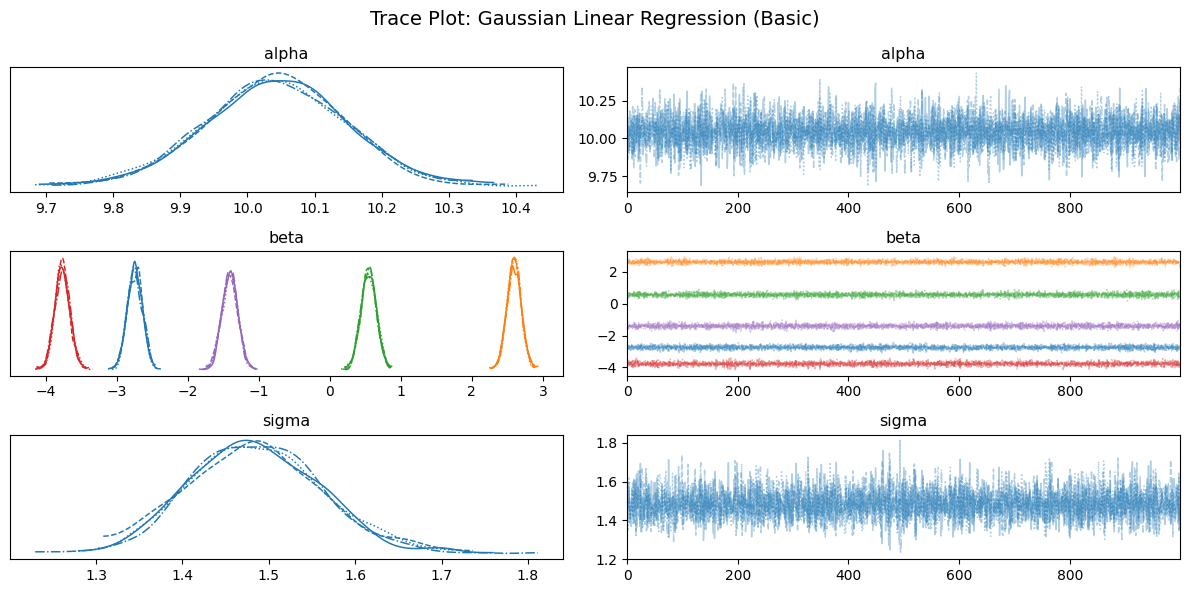

<Figure size 1200x800 with 0 Axes>

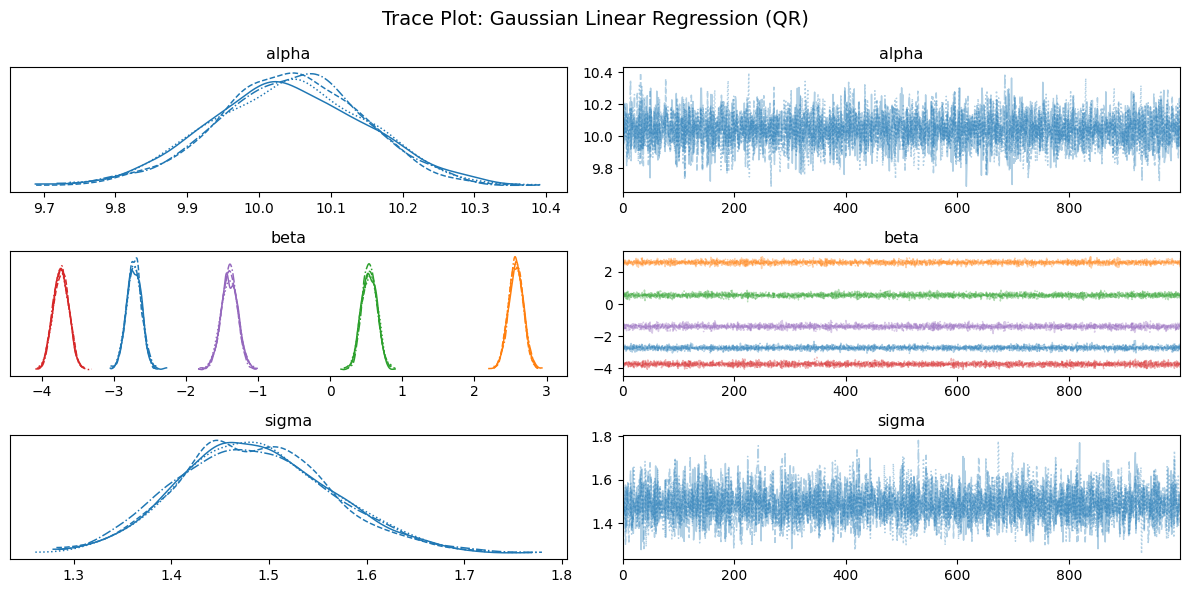

In [5]:
key_params = ["alpha", "beta", "sigma"]
plot_trace_plots(results, var_names=key_params)